<a href="https://www.kaggle.com/code/danielagudeydoe/k-nearest-neighbor-algorithm-for-dow-detection?scriptVersionId=167869435" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [14]:
# Load dataset
df = pd.read_csv('/kaggle/input/network-traffic-for-dos-detection/dataset.csv')

In [15]:
# Convert categorical variables to numerical labels
label_encoder = LabelEncoder()
df['vmcategory'] = label_encoder.fit_transform(df['vmcategory'])

In [16]:
# Define relevant features
selected_features = ['RTT', 'InvocationDelay', 'ResponseDelay', 'FunctionDuration', 'ActiveFunctionsAtRequest', 
                     'ActiveFunctionsAtResponse', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcorecountbucket', 'vmmemorybucket']

In [17]:
# Normalize selected features
scaler = MinMaxScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

In [18]:
# Define features and target
X = df[selected_features].values
y = df['bot'].values

In [19]:
# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Define K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [21]:
# Train KNN classifier and measure training time
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

In [22]:
# Predict on test set
y_pred = knn.predict(X_test)

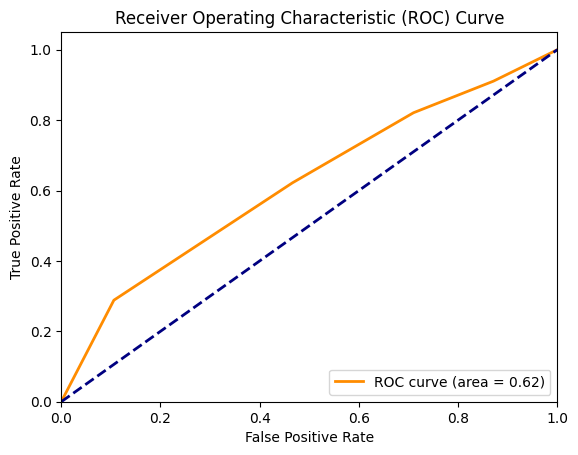

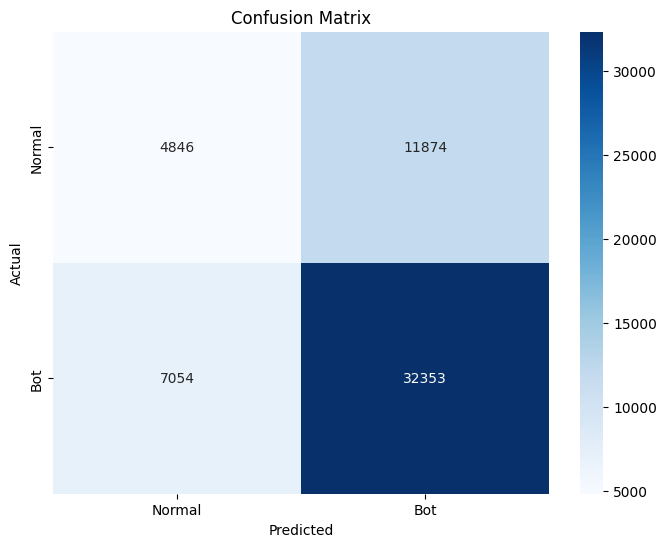

In [28]:
# Calculate ROC curve
y_pred_probs = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
#plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
#plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Normal', 'Bot'])
plt.yticks([0.5, 1.5], ['Normal', 'Bot'])
plt.show()

In [30]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print training time
print("Training Time (CT): {:.5f} seconds".format(training_time))

Accuracy: 0.6627648012542983
Precision: 0.7315214687860356
Recall: 0.820996269698277
F1 Score: 0.7736805605375804
Confusion Matrix:
[[ 4846 11874]
 [ 7054 32353]]
Training Time (CT): 0.26663 seconds


In [29]:
# Calculate performance overhead and delay
start_time = time.time()
y_pred = knn.predict(X_test)
end_time = time.time()

overhead = end_time - start_time
overhead_percentage = (overhead / start_time) * 100
delay = overhead / len(X_test)

print("Overhead (Time taken by the model to make predictions): {:.5f} seconds".format(overhead))
print("Overhead Percentage: {}%".format(overhead_percentage))
print("Delay (Average time taken per data point for prediction):{:.5f} seconds".format(delay))

Overhead (Time taken by the model to make predictions): 7.68980 seconds
Overhead Percentage: 4.4946427591658446e-07%
Delay (Average time taken per data point for prediction):0.00014 seconds
